# Lab-13 K-Means and K-Mode Clustering

## Tanishq Gupta - 19BCE1392

In [1]:
import numpy as np
import pandas as pd
import random 
import math

In [2]:
X = [[2,4], [2,6], [5,6], [4, 7], [8, 3], [6, 6], [5, 2], [5, 7], [6, 3], [4, 4]]

In [3]:
#k-means (without packages)
def dist(point_mat, l, cluster):
    n = len(point_mat)
    dist = []
    for i in range(n):
        d = 0
        for j in range(l):
            d += (point_mat[i][j] - cluster[j])**2
        dist.append(math.sqrt(d))
    return dist

In [4]:
def new_clusters(points, point_class, k, n, l):
    clusters = []
    for i in range(k):
        c = []
        for j in range(n):
            if(point_class[j] == i):
                c.append(points[j])
        clusters.append(c)
    new_clusters = []
    for cluster in clusters:
        m = len(cluster)
        if(m != 0):
            c = []
            for j in range(l):
                sum_point = 0
                for i in range(m):
                    sum_point += cluster[i][j]
                c.append(sum_point/m)
            new_clusters.append(c)
    return new_clusters

In [5]:
def classify_point(clusters, points, l, k, n):
    dist_mat = []
    for cluster in clusters:
        dist_mat.append(dist(points, l, cluster))
    point_class = []
    for i in range(n):
        d = []
        for j in range(k):
            d.append(dist_mat[j][i])
        min_in = -1
        min_dist = 10000000
        for j in range(k):
            if(min_dist > d[j]):
                min_dist = d[j]
                min_in = j
        point_class.append(min_in)
    return point_class

In [6]:
def kmean_cluster(k, l, points):
    n = len(points)
    clusters = []
    rand_list = random.sample(range(n), k)
    for r in rand_list:
        clusters.append(points[r])
    print('Initial Cluster Centroids :')
    print(clusters)
    point_class = classify_point(clusters, points, l, k, n)
    iterations = 10
    for i in range(iterations):
        clusters = new_clusters(points, point_class, k, n, l)
        point_class = classify_point(clusters, points, l, k, n)
    print('Class : ')
    print(point_class)
    return point_class, clusters

In [7]:
length = 2
X

[[2, 4],
 [2, 6],
 [5, 6],
 [4, 7],
 [8, 3],
 [6, 6],
 [5, 2],
 [5, 7],
 [6, 3],
 [4, 4]]

In [8]:
k = 2
yk, clusters = kmean_cluster(k, length, X)

Initial Cluster Centroids :
[[2, 6], [6, 3]]
Class : 
[0, 0, 0, 0, 1, 0, 1, 0, 1, 0]


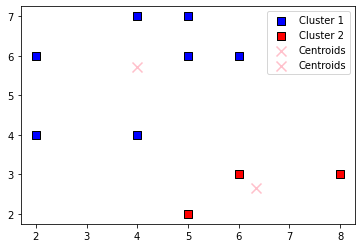

In [9]:
import matplotlib.pyplot as plt
X_0 = []
Y_0 = []
X_1 = []
Y_1 = []
for i in range(len(yk)):
    if(yk[i] == 0):
        X_0.append(X[i][0])
        Y_0.append(X[i][1])
    else:
        X_1.append(X[i][0])
        Y_1.append(X[i][1])
plt.scatter(X_0, Y_0, s=50, c='blue', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X_1, Y_1, s=50, c='red', marker='s', edgecolor='black', label='Cluster 2')
for i in range(len(clusters)):
    plt.scatter(clusters[i][0], clusters[i][1],  s=100, marker='x', c='pink', label='Centroids')
plt.legend(scatterpoints=1)
plt.show()

In [10]:
k = 3
yk, clusters = kmean_cluster(k, length, X)

Initial Cluster Centroids :
[[6, 6], [8, 3], [5, 7]]
Class : 
[2, 2, 0, 0, 1, 0, 1, 0, 1, 0]


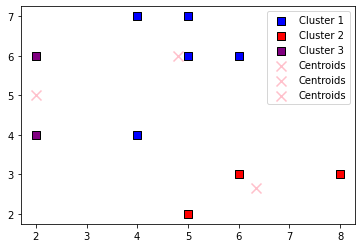

In [11]:
import matplotlib.pyplot as plt
X_0 = []
Y_0 = []
X_1 = []
Y_1 = []
X_2 = []
Y_2 = []
for i in range(len(yk)):
    if yk[i] == 0:
        X_0.append(X[i][0])
        Y_0.append(X[i][1])
    elif yk[i] == 1:
        X_1.append(X[i][0])
        Y_1.append(X[i][1])
    else:
        X_2.append(X[i][0])
        Y_2.append(X[i][1])
plt.scatter(X_0, Y_0, s=50, c='blue', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X_1, Y_1, s=50, c='red', marker='s', edgecolor='black', label='Cluster 2')
plt.scatter(X_2, Y_2, s=50, c='purple', marker='s', edgecolor='black', label='Cluster 3')
for i in range(len(clusters)):
    plt.scatter(clusters[i][0], clusters[i][1], s=100, marker='x', c='pink', label='Centroids')
plt.legend(scatterpoints=1)
plt.show()

In [12]:
X = [[2,4], [2,6], [5,6], [4, 7], [8, 3], [6, 6], [5, 2], [5, 7], [6, 3], [4, 4]]

In [13]:
#k-means (with packages)
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=2, init='random', n_init=15, random_state=0)
yk = kmean.fit_predict(X)
yk

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

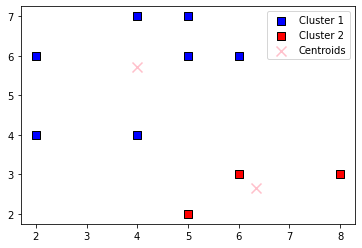

In [14]:
import matplotlib.pyplot as plt
X_0 = []
Y_0 = []
X_1 = []
Y_1 = []
for i in range(len(yk)):
    if(yk[i] == 0):
        X_0.append(X[i][0])
        Y_0.append(X[i][1])
    else:
        X_1.append(X[i][0])
        Y_1.append(X[i][1])
plt.scatter(X_0, Y_0, s=50, c='blue', marker='s', 
            edgecolor='black', label='Cluster 1')
plt.scatter(X_1, Y_1, s=50, c='red', marker='s', 
            edgecolor='black', label='Cluster 2')
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s=100, marker='x', c='pink', label='Centroids')
plt.legend(scatterpoints=1)
plt.show()

In [15]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3, init='random', n_init=15, random_state=0)
yk = kmean.fit_predict(X)
yk

array([1, 1, 2, 2, 0, 2, 0, 2, 0, 1])

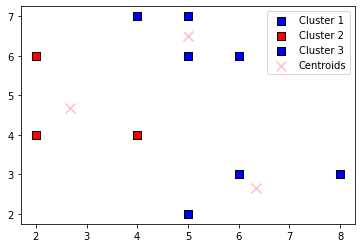

In [16]:
import matplotlib.pyplot as plt
X_0 = []
Y_0 = []
X_1 = []
Y_1 = []
X_2 = []
Y_2 = []
for i in range(len(yk)):
    if yk[i] == 0:
        X_0.append(X[i][0])
        Y_0.append(X[i][1])
    elif yk[i] == 1:
        X_1.append(X[i][0])
        Y_1.append(X[i][1])
    else:
        X_2.append(X[i][0])
        Y_2.append(X[i][1])
plt.scatter(X_0, Y_0, s=50, c='blue', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X_1, Y_1, s=50, c='red', marker='s', edgecolor='black', label='Cluster 2')
plt.scatter(X_2, Y_2, s=50, c='blue', marker='s', edgecolor='black', label='Cluster 3')
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1],  s=100, marker='x', c='pink', label='Centroids')
plt.legend(scatterpoints=1)
plt.show()

In [17]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=4, init='random', n_init=15, random_state=0)
yk = kmean.fit_predict(X)
yk

array([1, 1, 0, 0, 3, 0, 2, 0, 2, 2])

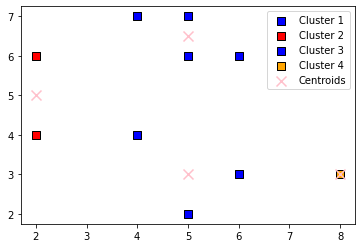

In [18]:
import matplotlib.pyplot as plt
X_0 = []
Y_0 = []
X_1 = []
Y_1 = []
X_2 = []
Y_2 = []
X_3 = []
Y_3 = []
for i in range(len(yk)):
    if yk[i] == 0:
        X_0.append(X[i][0])
        Y_0.append(X[i][1])
    elif yk[i] == 1:
        X_1.append(X[i][0])
        Y_1.append(X[i][1])
    elif yk[i] == 2:
        X_2.append(X[i][0])
        Y_2.append(X[i][1])
    else:
        X_3.append(X[i][0])
        Y_3.append(X[i][1])
plt.scatter(X_0, Y_0, s=50, c='blue', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X_1, Y_1, s=50, c='red', marker='s', edgecolor='black', label='Cluster 2')
plt.scatter(X_2, Y_2, s=50, c='blue', marker='s', edgecolor='black', label='Cluster 3')
plt.scatter(X_3, Y_3, s=50, c='orange', marker='s', edgecolor='black', label='Cluster 4')
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s=100, marker='x', c='pink', label='Centroids')
plt.legend(scatterpoints=1)
plt.show()

In [19]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=5, init='random', n_init=15, random_state=0)
yk = kmean.fit_predict(X)
yk

array([3, 4, 0, 0, 2, 0, 1, 0, 1, 3])

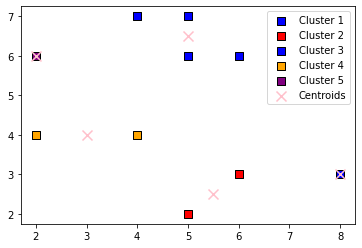

In [20]:
X_0 = []
Y_0 = []
X_1 = []
Y_1 = []
X_2 = []
Y_2 = []
X_3 = []
Y_3 = []
X_4 = []
Y_4 = []
for i in range(len(yk)):
    if yk[i] == 0:
        X_0.append(X[i][0])
        Y_0.append(X[i][1])
    elif yk[i] == 1:
        X_1.append(X[i][0])
        Y_1.append(X[i][1])
    elif yk[i] == 2:
        X_2.append(X[i][0])
        Y_2.append(X[i][1])
    elif yk[i] == 3:
        X_3.append(X[i][0])
        Y_3.append(X[i][1])
    else:
        X_4.append(X[i][0])
        Y_4.append(X[i][1])
plt.scatter(X_0, Y_0, s=50, c='blue', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X_1, Y_1, s=50, c='red', marker='s', edgecolor='black', label='Cluster 2')
plt.scatter(X_2, Y_2, s=50, c='blue', marker='s', edgecolor='black', label='Cluster 3')
plt.scatter(X_3, Y_3, s=50, c='orange', marker='s', edgecolor='black', label='Cluster 4')
plt.scatter(X_4, Y_4, s=50, c='purple', marker='s', edgecolor='black', label='Cluster 5')
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], s=100, marker='x', c='pink', label='Centroids')
plt.legend(scatterpoints=1)
plt.show()

## K-Mode Clustering 

In [21]:
!pip install kmodes
from kmodes.kmodes import KModes

In [22]:
df=pd.read_csv('bankmarketing.csv')
data = df[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]

In [23]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   default      41188 non-null  object
 5   housing      41188 non-null  object
 6   loan         41188 non-null  object
 7   contact      41188 non-null  object
 8   month        41188 non-null  object
 9   day_of_week  41188 non-null  object
 10  poutcome     41188 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.5+ MB


In [25]:
km = KModes(n_clusters=2, init='random', n_init=25)
yk1 = km.fit_predict(data)
yk1

array([1, 1, 1, ..., 0, 1, 0], dtype=uint16)

In [26]:
km.cluster_centroids_

array([['31', 'admin.', 'married', 'university.degree', 'no', 'yes',
        'no', 'cellular', 'may', 'thu', 'nonexistent'],
       ['35', 'blue-collar', 'married', 'high.school', 'no', 'no', 'no',
        'telephone', 'may', 'fri', 'nonexistent']], dtype='<U17')

In [27]:
df1 = data.copy(deep=True)
df1.insert(0, "Cluster", yk1, True)
df1

,Cluster,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,1,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,1,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,1,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,1,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,0,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,1,44,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


In [28]:
km = KModes(n_clusters=3, init='random', n_init=25)
yk1 = km.fit_predict(data)
yk1

array([2, 2, 1, ..., 0, 2, 0], dtype=uint16)

In [29]:
km.cluster_centroids_

array([['32', 'admin.', 'married', 'university.degree', 'no', 'yes',
        'no', 'cellular', 'aug', 'thu', 'nonexistent'],
       ['31', 'admin.', 'single', 'high.school', 'no', 'yes', 'no',
        'cellular', 'may', 'mon', 'nonexistent'],
       ['36', 'blue-collar', 'married', 'basic.9y', 'no', 'no', 'no',
        'telephone', 'may', 'fri', 'nonexistent']], dtype='<U17')

In [30]:
df1 = data.copy(deep=True)
df1.insert(0, "Cluster", yk1, True)
df1

,Cluster,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,2,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,2,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,1,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,2,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,2,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,0,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,2,44,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
